Problem statement
A restaurant consolidator is looking to revamp the B2C portal using intelligent automation tech. This requires a different matrix to identify the star restaurants and generate recommendations. To make sure an effective model can be achieved, it is important to understand the behavior of the data in hand.
There are 2 datasets, data and Country-Code. Dataset data has 19 attributes and Country-Code has two attributes.
You are required to determine certain matrices to identify the star restaurants and generate recommendations.

Importing, Understanding, and Inspecting Data:
1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.
2. Based on the findings from the previous questions, identify duplicates and remove them

In [3]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as snb;


In [4]:
df=pd.read_excel('Documents/data.xlsx')
df.columns = df.columns.str.strip()
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.shape

(9551, 19)

In [13]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
codedf=pd.read_excel('Documents/Country-Code.xlsx')

In [17]:
codedf.head(10)



,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [19]:
codedf.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [21]:
df.shape

(9551, 19)

In [23]:
df.duplicated().sum()

0

In [25]:
codedf.duplicated().sum()

0

In [27]:
df.shape

(9551, 19)

In [29]:
merged_df = pd.merge(df, codedf, on='Country Code', how='left')









In [31]:
merged_df.shape

(9551, 20)

In [33]:
#merged_df= merged_df.columns.str.replace(" ","_") inserting in column
merged_df.columns = merged_df.columns.str.replace(" ", "_")


In [35]:
merged_df.columns


Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [37]:
merged_df.isnull().sum()

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [39]:
merged_df=merged_df.dropna(subset=["Restaurant_Name","Cuisines"])

In [41]:
merged_df.isnull().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

Performing EDA:
3. Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants
4. Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence
5. Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking
6. Find out the percentage of restaurants providing online delivery
7. Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [44]:
geo_loc=merged_df.groupby(['Country_Code','Country']).agg(Count=('Restaurant_ID','count'))

In [46]:
geo_loc.sort_values(by='Count',ascending=False)

,,Count
Country_Code,Country,
1,India,8651
216,United States,425
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


In [48]:
City_loc=merged_df.groupby(['Country','City']).agg(Count=('Restaurant_ID','count'))

In [50]:
City_loc.describe()

,Count
count,140.000000
mean,68.150000
std,478.407895
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000


In [52]:

City_loc.sort_values(by='Count',ascending=False).head(1)

,,Count
Country,City,
India,New Delhi,5473


In [54]:
City_loc.sort_values(by='Count',ascending=True).head(1)


,,Count
Country,City,
Australia,Armidale,1


4. Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [57]:
restaurant_presence=merged_df.groupby(['Restaurant_Name','Country']).agg(Count=('Country','count'))
restaurant_presence.sort_values(by='Count',ascending=False).head(1)


,,Count
Restaurant_Name,Country,
Cafe Coffee Day,India,83


5. Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking


In [60]:
merged_df['Has_Table_booking'].value_counts()

Has_Table_booking
No     8383
Yes    1158
Name: count, dtype: int64

In [62]:
yes_count = merged_df['Has_Table_booking'].value_counts().get('Yes', 0)
no_count = merged_df['Has_Table_booking'].value_counts().get('No', 0)




In [64]:
Ratio= yes_count/no_count*100

In [66]:
Ratio

13.813670523678873

6. Find out the percentage of restaurants providing online delivery


In [69]:
provinding_online_delivery=merged_df['Has_Online_delivery'].value_counts().get('Yes',0)
not_providing_online_delivery=merged_df['Has_Online_delivery'].value_counts().get('No',0)
total_count=provinding_online_delivery + not_providing_online_delivery

In [71]:
total_count

9541

In [73]:
Percentage_of_Online_delivery=provinding_online_delivery/total_count*100
Percentage_of_Online_delivery

25.68913111833141

7. Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver


In [76]:
vote_count_delivery=merged_df[merged_df['Has_Online_delivery']=='Yes']
count_deliver=vote_count_delivery['Votes'].sum()


In [78]:
vote_count_not_delivery=merged_df[merged_df['Has_Online_delivery']=='No']
count_not_deliver=vote_count_not_delivery['Votes'].sum()

In [80]:
difference_in_number_of_votes=count_deliver-count_not_deliver

In [82]:
difference_in_number_of_votes

-459322

Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver----for this we can observe the non-deliver restaurants has the highest votes

Performing EDA:
1. What are the top 10 cuisines served across cities?
2. What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?
3. What is the distribution cost across the restaurants?
4. How ratings are distributed among the various factors?
5. Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.


In [86]:
top10cusines=merged_df.groupby('Cuisines').agg(Count=('Cuisines','count'))
top10cusines.sort_values(by='Count',ascending=False).head(5)

,Count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334


2. What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?

In [89]:
Most_served=merged_df.groupby(['Restaurant_Name','City']).agg(Count=('Cuisines','count'))
Most_served.sort_values(by='Count',ascending=False)



Count
Restaurant_Name                  City                 
Cafe Coffee Day                  New Delhi          57
Domino's Pizza                   New Delhi          55
Subway                           New Delhi          38
Green Chick Chop                 New Delhi          37
McDonald's                       New Delhi          33
...                                                ...
Gazebo                           Rest of Hawaii      1
                                 Abu Dhabi           1
Gayway Bakery                    New Delhi           1
Gayatri's Break Point Restaurant New Delhi           1
Ìàukura€Ùa Sofras€±              Ankara              1

[7964 rows x 1 columns]

In [91]:
Most_served.sort_values(by='Count',ascending=False).head(5)

,,Count
Restaurant_Name,City,
Cafe Coffee Day,New Delhi,57
Domino's Pizza,New Delhi,55
Subway,New Delhi,38
Green Chick Chop,New Delhi,37
McDonald's,New Delhi,33


In [93]:
Most_served.sort_values(by='Count',ascending=False).tail(5)

Count
Restaurant_Name                  City                 
Gazebo                           Rest of Hawaii      1
                                 Abu Dhabi           1
Gayway Bakery                    New Delhi           1
Gayatri's Break Point Restaurant New Delhi           1
Ìàukura€Ùa Sofras€±              Ankara              1

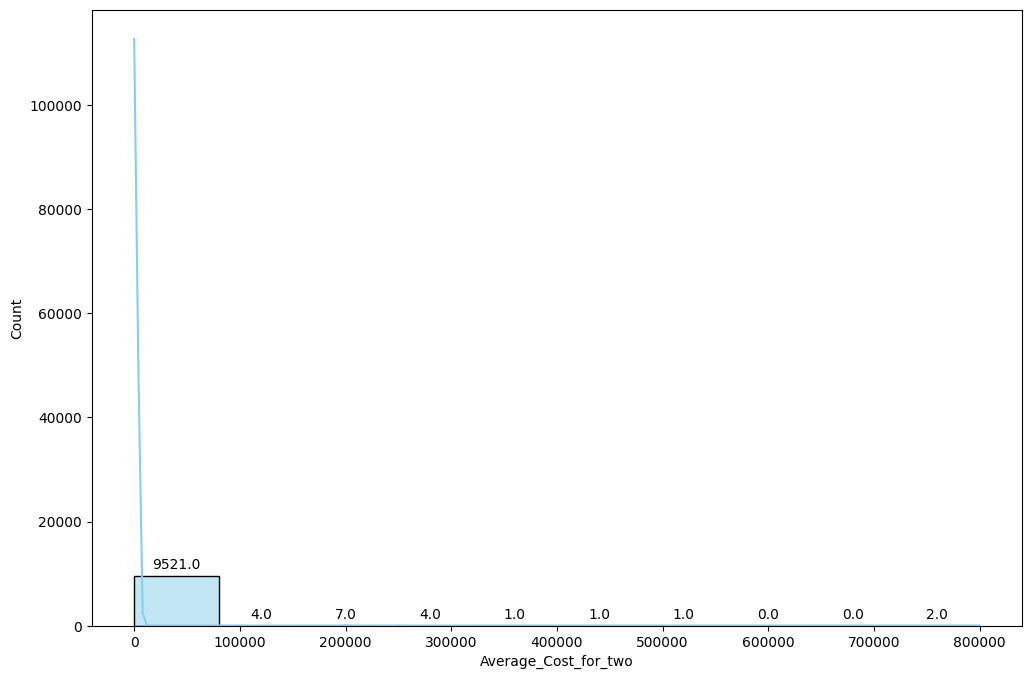

In [95]:
plt.figure(figsize=(12,8))
ax=snb.histplot(data=merged_df, x='Average_Cost_for_two', bins=10, kde=True, color='skyblue')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)
plt.show()



4. How ratings are distributed among the various factors?


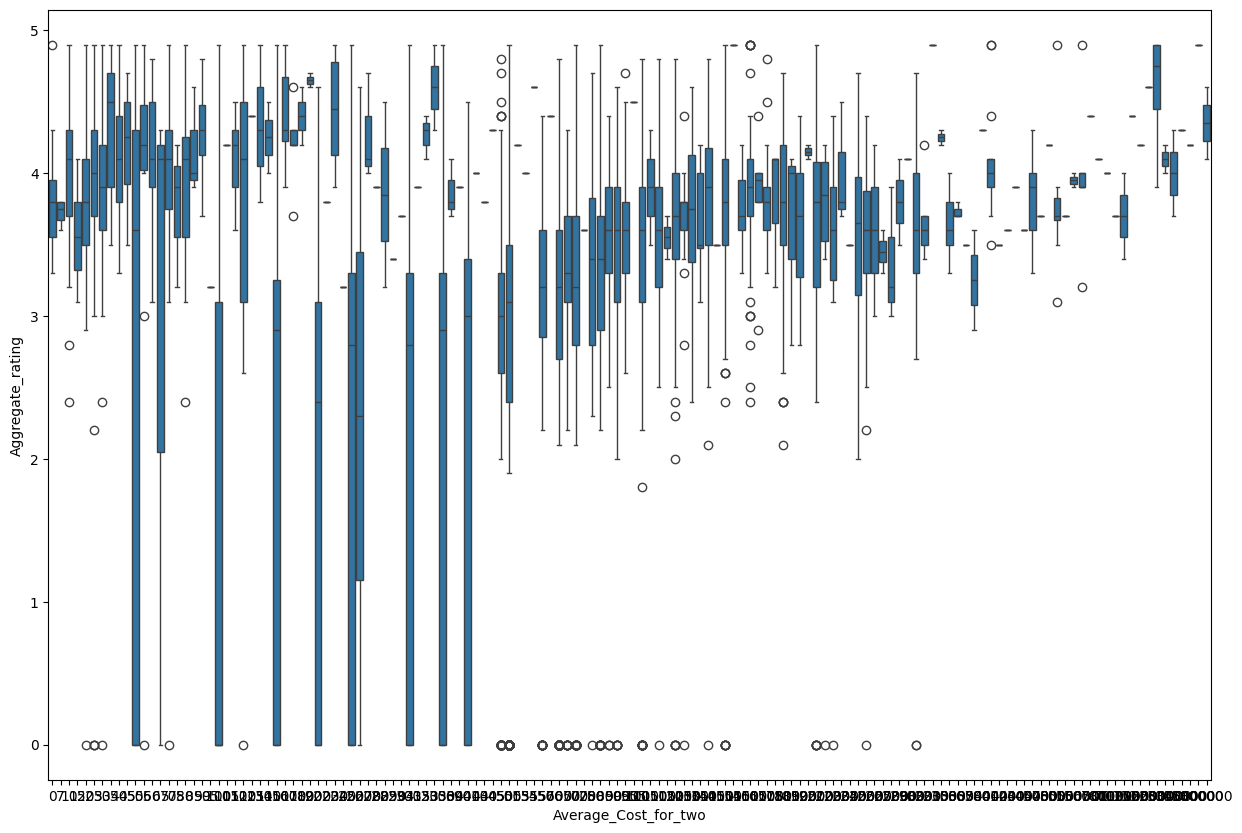

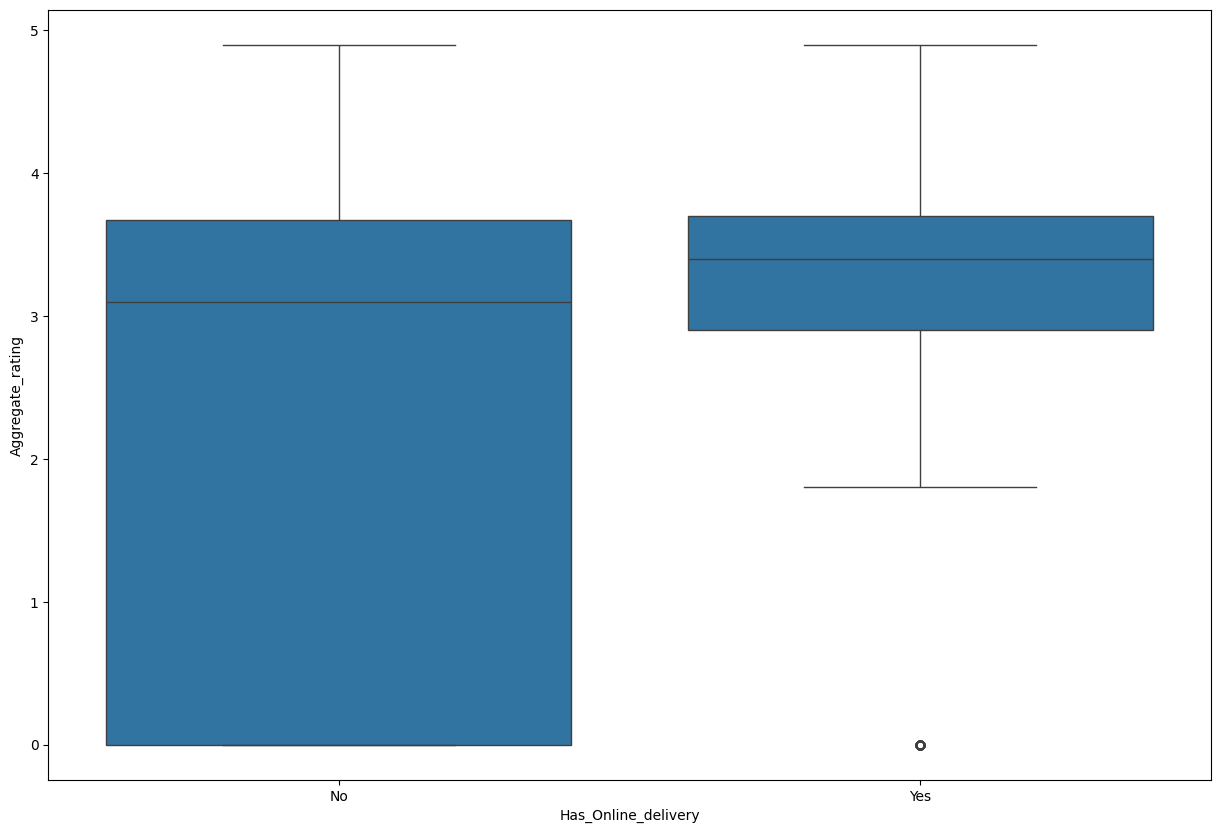

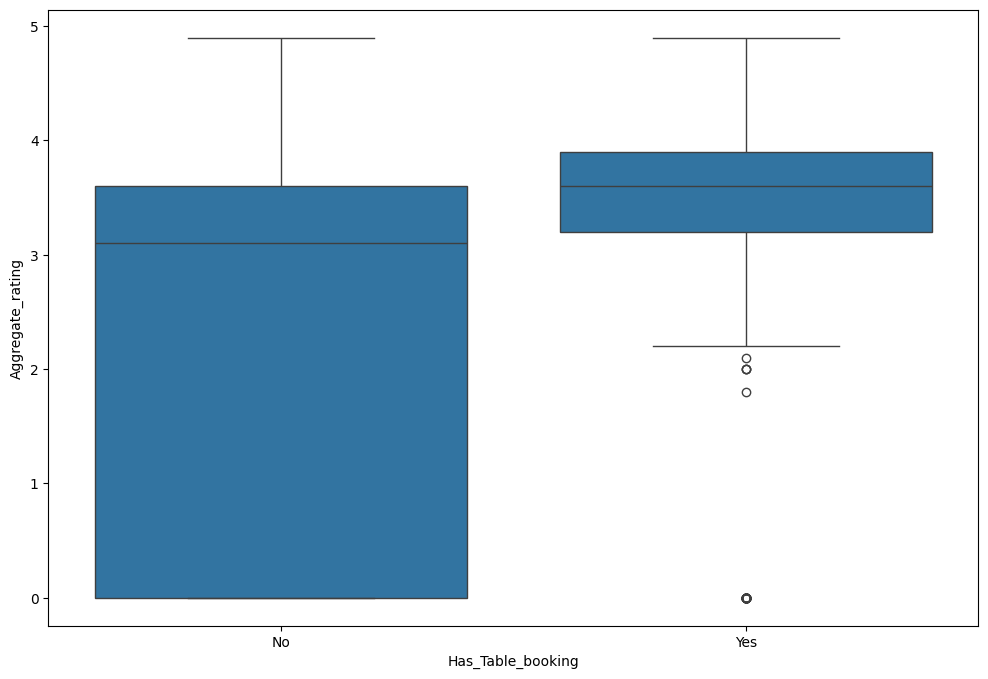

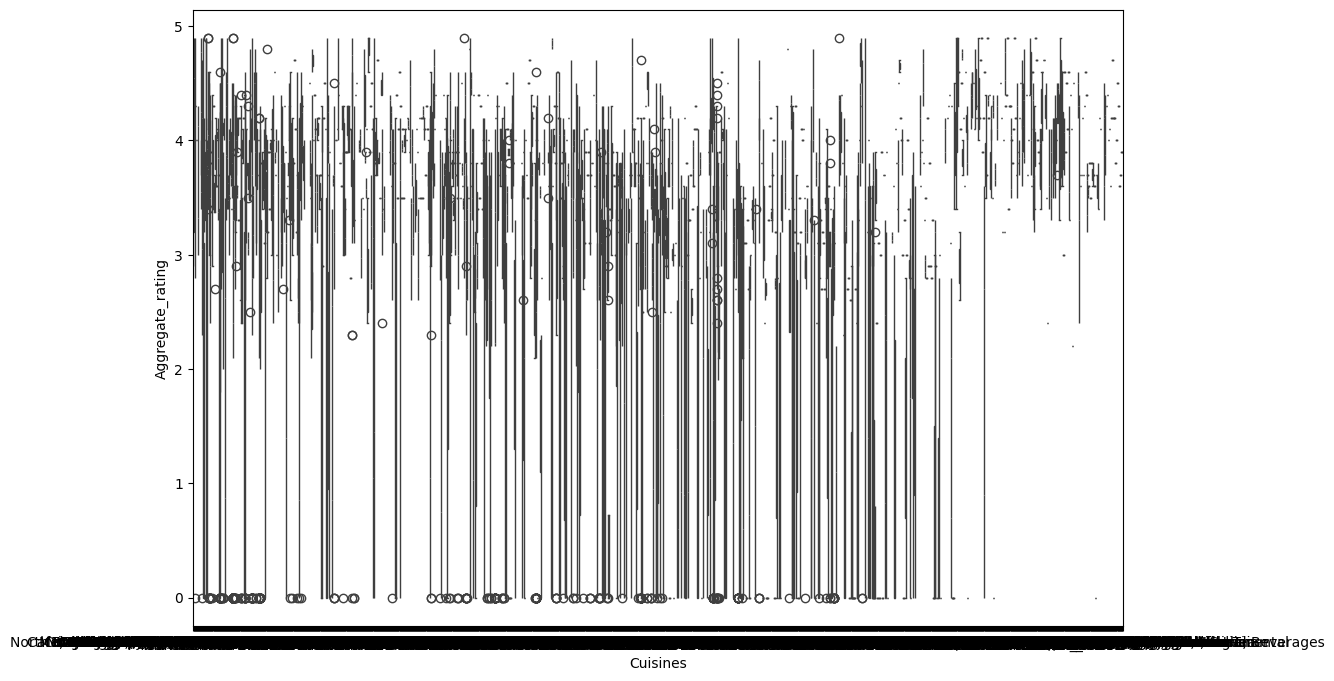

In [97]:
plt.figure(figsize=(15,10))
snb.boxplot(data=merged_df, x='Average_Cost_for_two', y='Aggregate_rating')
plt.show()

plt.figure(figsize=(15,10))
snb.boxplot(data=merged_df, x='Has_Online_delivery', y='Aggregate_rating')
plt.show()

plt.figure(figsize=(12,8))
snb.boxplot(data=merged_df, x='Has_Table_booking', y='Aggregate_rating')
plt.show()

plt.figure(figsize=(12,8))
snb.boxplot(data=merged_df, x='Cuisines', y='Aggregate_rating')
plt.show()

5. Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.


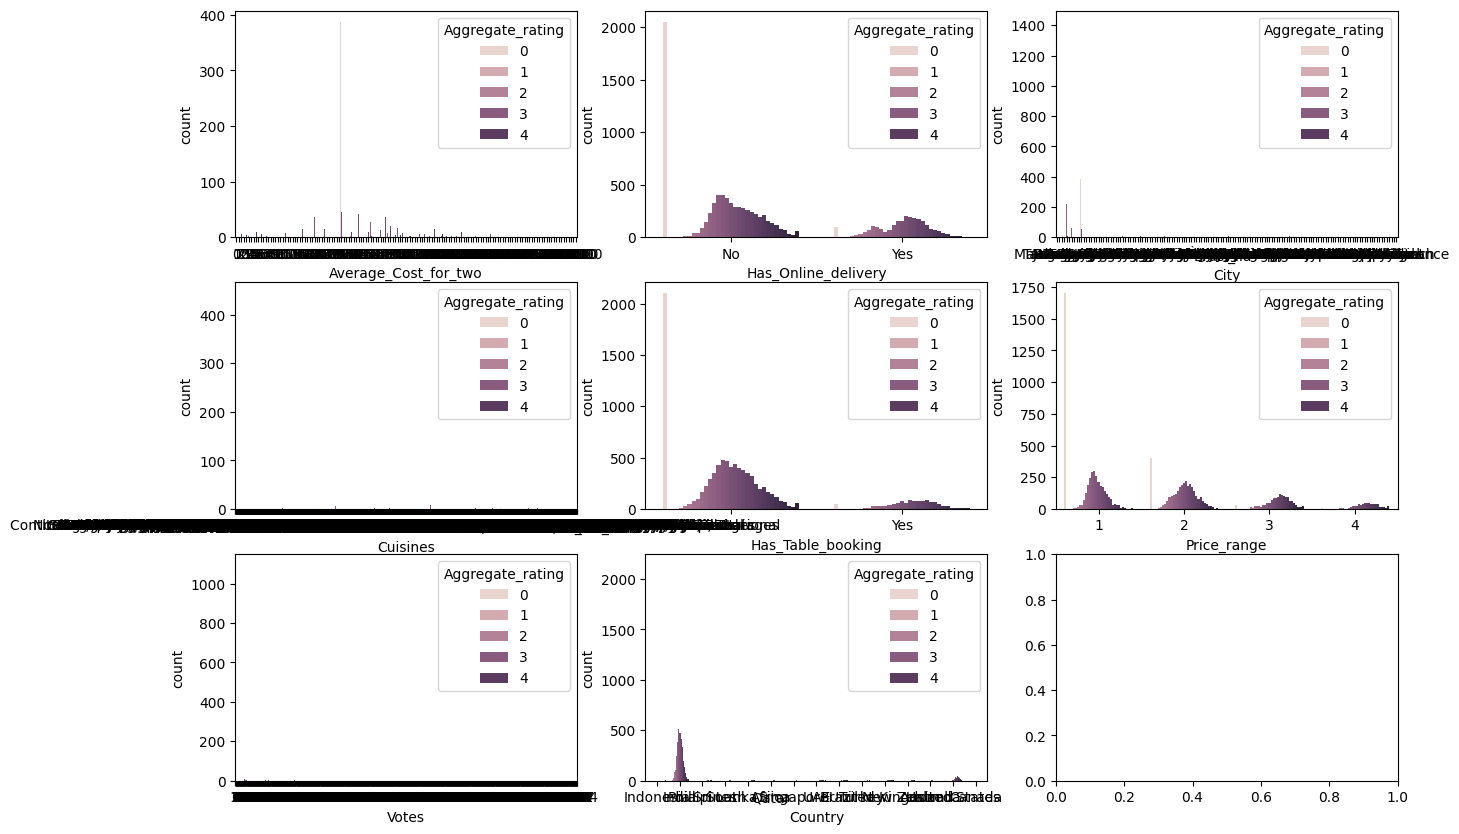

In [100]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
cat_features=['Average_Cost_for_two','Has_Online_delivery','City','Cuisines','Has_Table_booking','Price_range','Votes','Country','Aggregate_rating']
for idx,feature in enumerate(cat_features):
    if feature != 'Aggregate_rating':
        ax=axes[int(idx/3),idx%3]
        snb.countplot(x=feature, hue='Aggregate_rating',ax=ax,data=merged_df)